In [1]:
import math

from hilbert import quantum
from hilbert.curves import lib

In [2]:
system = quantum.SplitToyTrain(-150, 150, 301, splitters=(dict(x=0, theta=math.pi/5, phi=math.pi/7),))
std = 5
gaussian = system[0][1, 'delta']*system[1](lib.Gaussian(1, -1/(4*std**2), 20, pole=-35))
histories = system.collapsing_history(gaussian, (1, 1), go_on=lambda v: round(v[-1].image[1].norm, 31))

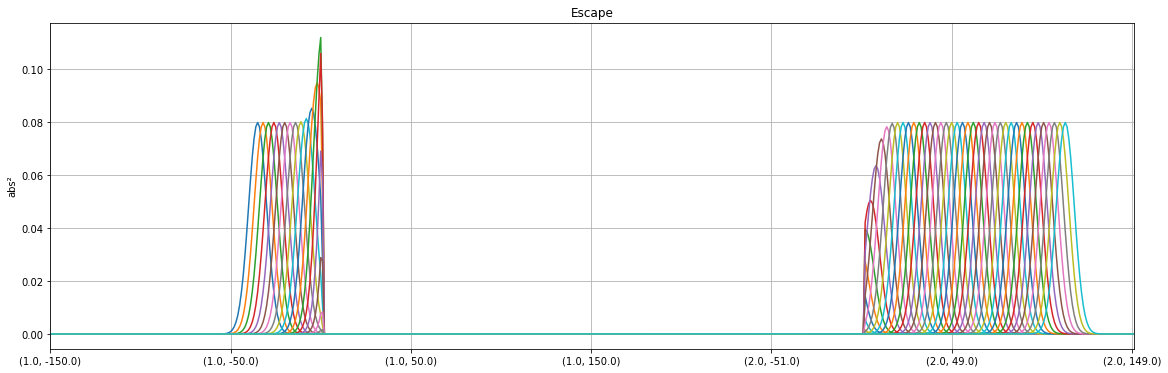

In [3]:
histories.simulate_density(step=3)  # The wave packet escapes to channel 2

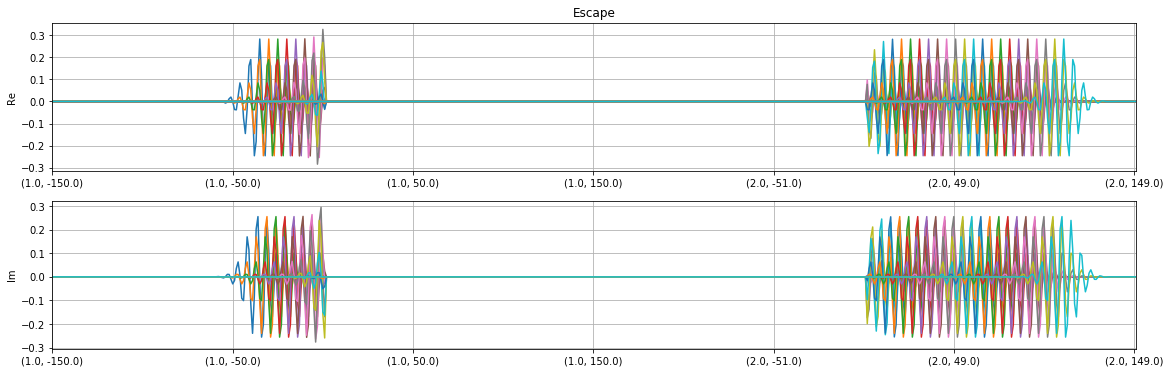

In [4]:
histories.simulate(step=5)

In [5]:
assert system.hop_op.is_unitary()
assert histories.consistent
assert not round(histories.weight - math.sin(math.pi/5)**2, 12), histories.weight